# TSF Task-1


# Prediction using Supervised ML


# SUSHANT KUMAR

In [1]:
#importing modules

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"

In [3]:
# Reading csv file

df = pd.read_csv(url)

# Exploring the data

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#The info() function is used to print a concise summary of a DataFrame. 
#This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


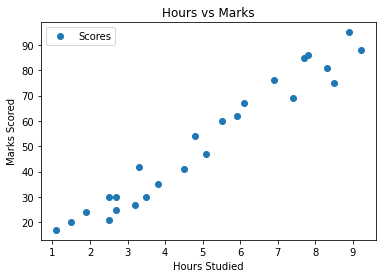

In [7]:
# Plotting the distribution of scores

df.plot(x ='Hours',y ='Scores',style ='o')
plt.title('Hours vs Marks')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.show()

##### From the graph it is clear that there is linear relationship between the number of hours studied and percentage of score

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEB8989948>,
      dtype=object)

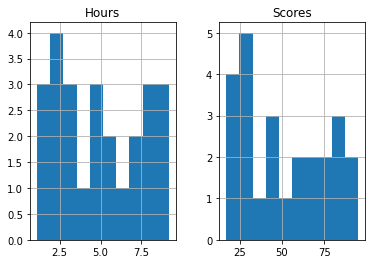

In [8]:
df.hist()

### Preparing the Data

In [9]:
X = df.iloc[:, :-1].values.reshape(-1,1)
y = df.iloc[:, 1].values

We will use train_test_split() method of scikit-learn to train and test the data set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### Training the algorithm

In [11]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Training Complete')

Training Complete


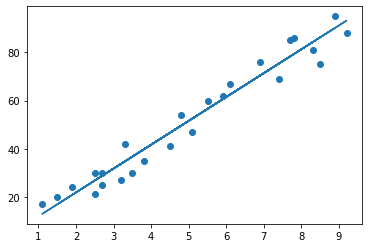

In [12]:
#Plotting the regression line

line = lr.coef_*X+lr.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions 

In [13]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Comparing Actual vs Predicted
ac = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
ac 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting the score if the student studies for 9.25 hrs/day

In [15]:
hours = [[9.25]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


## Evaluating the model 

Evaluation metrics are used to measure the quality of the statistical or machine learning model.

In [16]:
from sklearn import metrics
Linear=metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',Linear)

Mean Absolute Error: 4.183859899002975
